In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

import numpy as np
from scipy.stats import binom
import seaborn as sb
from numpy import random
import seaborn as sns
from scipy.stats import binom
%matplotlib inline

In [3]:
ln.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [4]:
#bentuk ada 414 baris, dan 8 kolom 
ln.shape

(414, 8)

In [2]:
#sebuah data penilaian real estate di ngra australia
ln = pd.read_csv('Real estate valuation data set.csv')
ln.head(20)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
5,6,2012.667,7.1,2175.03000,3,24.96305,121.51254,32.1
6,7,2012.667,34.5,623.47310,7,24.97933,121.53642,40.3
7,8,2013.417,20.3,287.60250,6,24.98042,121.54228,46.7
8,9,2013.500,31.7,5512.03800,1,24.95095,121.48458,18.8
9,10,2013.417,17.9,1783.18000,3,24.96731,121.51486,22.1


In [5]:
ln.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [6]:
#missing value. tujuan dari mencari missing value yaitu menganalisa suata data yang kehilangan nilai
#missing value dapat mengakibatkan mengurangi kekuatan statistik, perkiraan yang bias dan mengarah kesimpulan yang tidak vali
ln1 = ln.dropna()

In [7]:
#setelah dicek missing valuenya, maka valuenya -> 414 baris, dan 8 kolom
ln1.shape

(414, 8)

In [8]:
#memprediksi harga rumah apakah bisa naik jika
y = ln1['Y house price of unit area']
y

0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: Y house price of unit area, Length: 414, dtype: float64

In [9]:
#banyaknya data dari Real estate yaitu ada 414, nilai rata2 1083, 
#di dalam variabel y, dan jika sudah didescribe/digambarkan terdapat 414 nilai, rata2 nilainya di angka 37
#di dalam variabel y std nilainya ada 13 macam
#

y.describe()

count    414.000000
mean      37.980193
std       13.606488
min        7.600000
25%       27.700000
50%       38.450000
75%       46.600000
max      117.500000
Name: Y house price of unit area, dtype: float64

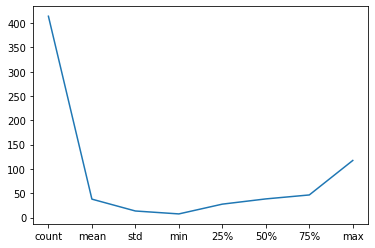

In [10]:
plt.plot(y.describe())

In [11]:
y.std()

13.606487697735314

In [12]:
#lokasi dekat MRT Station, dan toko
features = ['X3 distance to the nearest MRT station','X4 number of convenience stores']
X = ln1[features]
X

,X3 distance to the nearest MRT station,X4 number of convenience stores
0,84.87882,10
1,306.59470,9
2,561.98450,5
3,561.98450,5
4,390.56840,5
...,...,...
409,4082.01500,0
410,90.45606,9
411,390.96960,7
412,104.81010,5


In [13]:
X.describe()

,X3 distance to the nearest MRT station,X4 number of convenience stores
count,414.000000,414.000000
mean,1083.885689,4.094203
std,1262.109595,2.945562
min,23.382840,0.000000
25%,289.324800,1.000000
50%,492.231300,4.000000
75%,1454.279000,6.000000
max,6488.021000,10.000000


# model&fungsi

In [14]:
from sklearn.tree import DecisionTreeRegressor

In [15]:
#membangun model klasifikasi data, yang tujuannya untuk memecah kumpulan data menjadi bagian himpunan yang lebih kecil lagi
ln1_model = DecisionTreeRegressor(random_state=1)

In [16]:
#train model
ln1_model.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

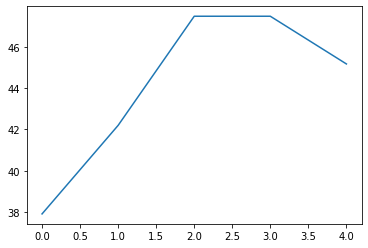

In [17]:
#prediksi
plt.plot(ln1_model.predict(X.head()))

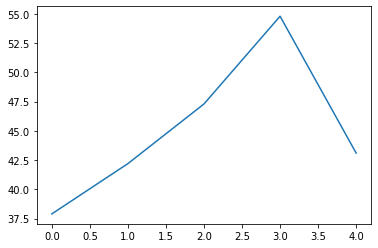

In [18]:
plt.plot(y.head())

In [19]:
#evaluasi metric
from sklearn.metrics import mean_absolute_error

In [20]:
y_hat = ln1_model.predict(X)
mean_absolute_error(y, y_hat)

1.4237213886489248

# Training & Testing DataSet


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [23]:
ln1_model = DecisionTreeRegressor(random_state=1)
ln1_model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

In [24]:
y_hat = ln1_model.predict(X_test) #mean absolute error mengukur kesalahn antra pengamatan berpasangan yang mengungkapkan fenomena yg sama
mean_absolute_error(y_test, y_hat) #dan valuenya 6.20

6.201856684981686

In [25]:
print(y_hat) #nilai prediksi dari y (variabel dependen) dalam persamaan regresi, ataupun bisa DIANGGAP sbg nilai rata2 dari variabel respon

[ 29.5         48.35        24.7         17.3         26.9
  30.5         28.6         34.3         43.1         13.2
  13.2         40.9         21.55        41.          58.4
  22.9         26.9         54.45        28.1         50.63333333
  37.9         23.2         38.3         40.2         45.5
  26.5         28.1         47.06        44.625       16.8
  23.1         31.5         36.8         47.06        44.3
  16.8         38.3         35.1         40.85        17.3
  42.3         19.          58.4         29.14        30.05
  28.9         31.1         44.2         36.5         34.1
  16.8         60.7         42.          16.8         44.9
 117.5         26.9         37.5         42.4         40.52857143
  19.          33.3         24.7         16.8         41.4
  44.9         56.66666667  41.9         16.8         41.4
  50.63333333  13.2         47.          44.625       58.4
  48.1         36.8         37.5         28.5         50.63333333
  37.5         46.23333333  37.9  

In [26]:
y_test.describe()

count    104.000000
mean      36.601923
std       13.352270
min       11.600000
25%       26.000000
50%       37.400000
75%       45.600000
max       69.700000
Name: Y house price of unit area, dtype: float64

In [27]:
y_test.head()

388    27.3
102    54.4
187    22.0
162    11.6
90     45.4
Name: Y house price of unit area, dtype: float64

In [28]:
X_test.head()

,X3 distance to the nearest MRT station,X4 number of convenience stores
388,2251.9380,4
102,193.5845,6
187,3078.1760,0
162,4066.5870,0
90,274.0144,1


In [29]:
y_test = 310
mu = 36.60
var = 6.0
err = 6.0
for i in range (y_test): #perulangan i di dalam lingkup NTs
    x = np.random.normal(mu , var , y_test) #menyimpan property
    err += (x.mean()-mu)**2
    print('MSE:', err/y_test) #rata-rata kuadrat kesalahan; jika angkanya semakin besar, maka kesalahannya semkin besar pula

MSE: 0.020252030862381448
MSE: 0.020673790392966268
MSE: 0.02148752911538361
MSE: 0.021565095878231574
MSE: 0.022500947373973137
MSE: 0.024481732322785763
MSE: 0.024532303296811758
MSE: 0.02473902059277809
MSE: 0.02474360245977531
MSE: 0.025835994167623885
MSE: 0.026143773950795493
MSE: 0.02672635239552404
MSE: 0.02695583219066893
MSE: 0.02700884008528795
MSE: 0.027017164067519594
MSE: 0.02714547084916633
MSE: 0.028543497984001794
MSE: 0.030934061421628998
MSE: 0.03093676596930934
MSE: 0.03133377902347975
MSE: 0.031561095152821975
MSE: 0.032599995787206563
MSE: 0.032907269262139445
MSE: 0.03305196056258179
MSE: 0.033518526374138435
MSE: 0.03360698073155881
MSE: 0.03383949630540581
MSE: 0.034489899800822774
MSE: 0.034654732491425956
MSE: 0.03495514715061621
MSE: 0.034955221209645934
MSE: 0.03500527974733408
MSE: 0.03575864337715473
MSE: 0.035768293814584295
MSE: 0.03657014722149316
MSE: 0.03715865721034233
MSE: 0.03816347315036949
MSE: 0.03867482591191872
MSE: 0.038971461906169146
MSE: 

In [30]:
import matplotlib.pyplot as plt
from sklearn import linear_model
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

In [35]:
reg = linear_model.LinearRegression() #meminimalkan jumlah sisa kuadrat antara
#target yg diamati dalam dataset, dan target yg diprediksi dengan pendekatan linear
ar = np.array([[[4],[6],[0]], [[27.3],[54.4],[22.0]]])
y = ar[1,:]
x = ar[0,:]
reg.fit(x,y) #mengambil data train sbg ARGUMEN, yg dapat menjadi salah satu array dalam kasus pembelajaran tnp pengawasan
print('Coefficients:\n', reg.coef_) #coef_ untuk masalah regresi linier. jika bbrpa target diterukan selama FIT(y 2D) dan ini adl bntuk array 2D


Coefficients:
 [[4.81785714]]


In [32]:
y = ar[1,:]
x = ar[0,:]

reg.fit(x,y) #1.fit_intercept=True suatu kondisi apakh akan menghitung intersep suatu model. doi tdk akan akan
#1. menghtung jika nilainya false "normalize=False"
#2. normalize=False sbnrnya parameter ini diabaikan jika "fit_intercept" nilainya FALSE, dan jika benar, REGRESSOR X akan
#2. dinormalisasi sblum regresi dg mengurangkan nilai rata2 & membaginya dg norma-I2
#3. copy_X jika benar akan disalin, dan jika tidak akan ditimpa
#4. n_jobs=None jumlh tugas untuk penghitungan. ini akan hny mmberikan percepatan untuk n_target > 1. none = 1
print(reg.fit)

<bound method LinearRegression.fit of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)>


In [33]:
#NPs = 1000

ValueError: x and y must have same first dimension, but have shapes (1,) and (104,)

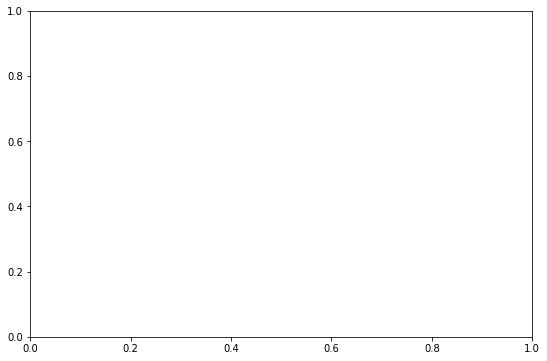

In [34]:
fig, ax = plt.subplots(figsize=(9,6))
plt.style.use('fivethirtyeight')
ax.plot(y_test, y_hat)

ax.fill_between(y_test, y_hat, 0, alpha=0.3, color='blue')
ax.fill_between(y_test, y_hat,0, alpha=0.1, color='black')
ax.set_xlim([-4,4])
ax.set_xlabel('# of Standard Deviations Outside the Mean')
ax.set_yticklabels([])
ax.set_title('Normal Gaussian Curve')

plt.savefig('normal_curve.png', dpi=72, bbox_inches='tight')
plt.show()